In [22]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
from numpy.random import randn
import os
from datetime import datetime

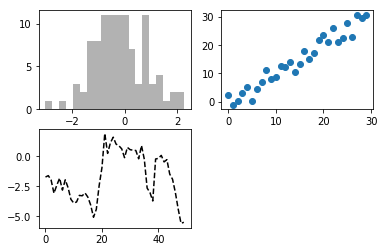

In [23]:
# maplotlib的图像都在Figure对象中，可以用plt.figure创建一个新的Figure
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)             # 返回的是AxesSubplot对象
plt.plot(randn(50).cumsum(),'k--')  # k-- 是一个线型选项,最简单的折线图

_ = ax1.hist(randn(100),bins=20,color='k',alpha=0.3)  # 直方图
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))       # 散点图


[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000165ED964A58>


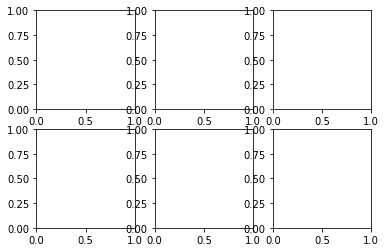

In [24]:
# 也可以根据plt.subplots方法中直接创建一个新的figure对象，
# 并返回一个含有已创建的subplot对象的numpy数组
fig, axes = plt.subplots(2,3)
print(axes)

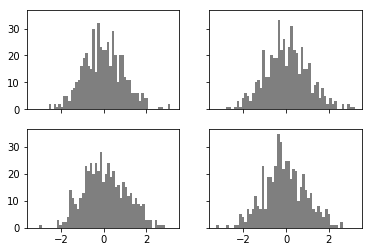

In [25]:
# 未调整subplot周围的间距
fig, axes = plt.subplots(2, 2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)


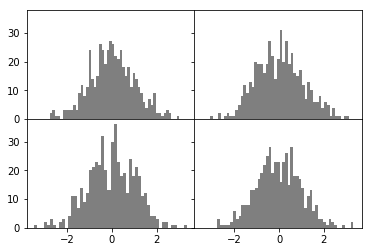

In [26]:
# 调整subplot周围的间距
fig, axes = plt.subplots(2, 2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0) # 注意其中的轴标签重叠了


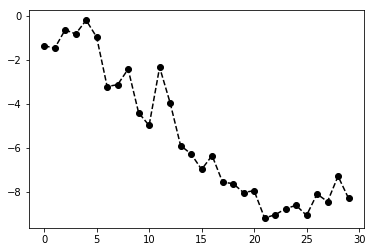

In [27]:
plt.plot(randn(30).cumsum(),'ko--') # 

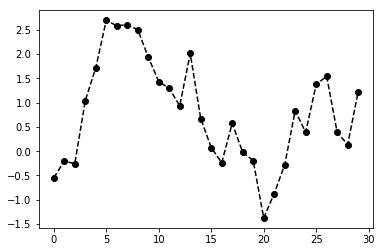

In [28]:
# 还可以将其写成更为明确的形式,和上面的参数设置效果是一样的
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

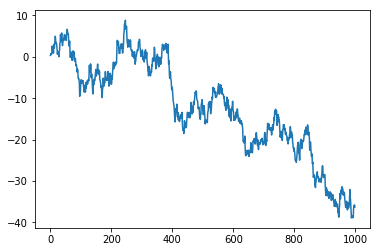

In [29]:
# 刻度、标签和图例，下面介绍如何设置标题、周标签、刻度以及刻度标签
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

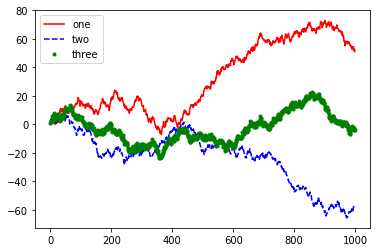

In [30]:
# 添加图例，添加图例有两种方式：
# 第一种方式，在添加subplot的时候传入label参数：
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(),'k',label='one',color='r')
ax.plot(randn(1000).cumsum(),'k--',label='two',color='b')
ax.plot(randn(1000).cumsum(),'k.',label='three',color='g')
# 然后调用ax.legend()来自动创建图例：
ax.legend(loc='best')

Text(0, 0.5, 'Ystages')

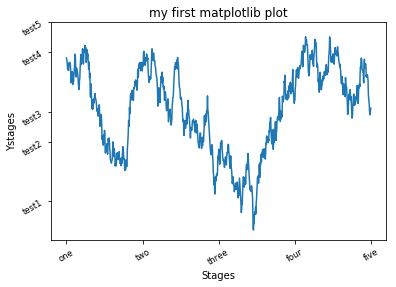

In [31]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ticks = ax.set_yticks([-25, -15, -10, 0, 5])
labels = ax.set_yticklabels(['test1','test2','test3','test4','test5'],rotation=30,fontsize='small')
ax.set_title('my first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Ystages')


Text(0.75, 0.6, 'Hello world!')

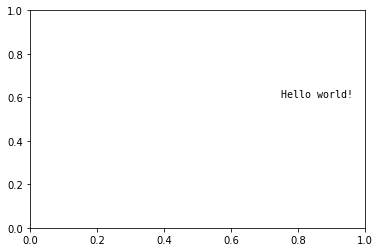

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.75, 0.6,           # 相对坐标轴的比例
        'Hello world!',
        family='monospace',
        fontsize=10)                # 放置标注文本

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


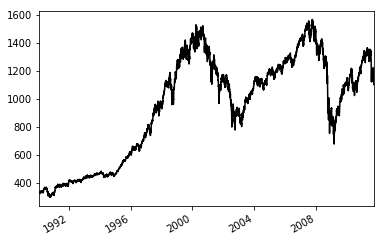

In [33]:
path = os.getcwd()+'\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


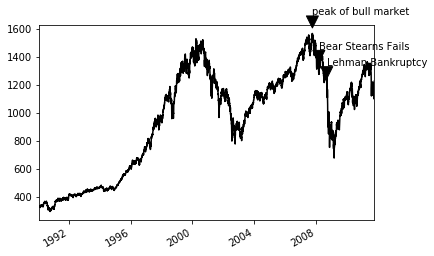

In [34]:
path = os.getcwd()+'\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
for date,label in crisis_data:
    ax.annotate(label,xy=(date, spx.asof(date)+50)
                    ,xytext=(date,spx.asof(date)+200)
                    ,arrowprops=dict(facecolor='black')
                    ,horizontalalignment='left'
                    ,verticalalignment='top')
# 

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Important dates in 2008-2009 financial crisis')

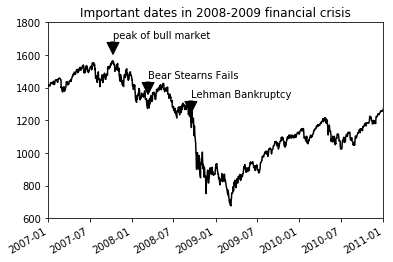

In [35]:
path = os.getcwd()+'\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
for date,label in crisis_data:
    ax.annotate(label,xy=(date, spx.asof(date)+50)
                    ,xytext=(date,spx.asof(date)+200)
                    ,arrowprops=dict(facecolor='black')
                    ,horizontalalignment='left'
                    ,verticalalignment='top')
# 放大到2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

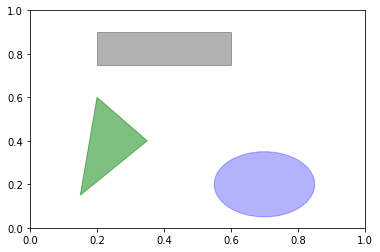

In [36]:
# 要在图表中添加一个图形，需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)     # 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)  
pgon = plt.Polygon([[0.15, 0.15],[0.35, 0.4],[0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('fig_pat.png',dpi=400,bbox_inches='tight')   # dpi(控制‘每英寸点数’分辨率),bbox_inches('tight')

In [37]:
# 下面研究如何将图表保存到文件
# 利用plt.savefig可以将当前图表保存到文件。
# 例如保存为svg文件的话，需要输入
# plt.savefig('test.svg')
plt.savefig('fig_pat.png',dpi=400,bbox_inches='tight')   # dpi(控制‘每英寸点数’分辨率),bbox_inches('tight')剪除空白的部分


# Figure.savefig的选项Figure.savefig(fname,dpi,facecolor,format,bbox_inches)

<Figure size 432x288 with 0 Axes>

In [48]:
# savefig并非一定要写入磁盘，也可以写入任何文件类型的对象，比如StringIo
from io import BytesIO

buffer = BytesIO()   # 原文中，使用StringIo的方法会报TypeError: string argument expected, got 'bytes' 错误，所以这里使用的  BytesIO方法
plt.savefig(buffer)
plot_data = buffer.getvalue()
plot_data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01 \x08\x06\x00\x00\x00\xd5(&i\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 3.0.3, http://matplotlib.org/\x9d\x0b\xab\xa3\x00\x00\x04WIDATx\x9c\xed\xd5A\r\x00 \x10\xc00\xc0\xbf\xe7\xc3\x03\x1f\xb2\xa4U\xb0\xdf\xf6\xcc\xcc\x02\x80\x98\xf3;\x00\x00^\x18\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\

<Figure size 432x288 with 0 Axes>

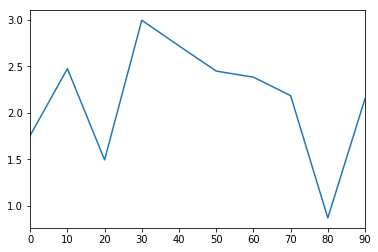

In [49]:
# pandas中也有绘图函数
# 利用pandas绘制线型图
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(kind='line',use_index=True)                                                        # series的plot方法Y为数据，X轴为默认的索引


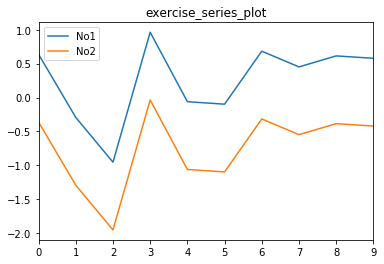

In [50]:
# 练习：使用series.plot的参数
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(kind='line',legend=True,use_index=False,title='exercise_series_plot',label='No1')   # series的plot方法Y为数据，X轴为默认的索引
(s-1).plot(kind='line',legend=True,use_index=False,label='No2')   # series的plot方法Y为数据，X轴为默认的索引


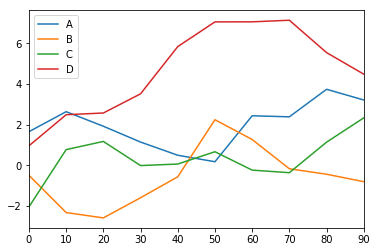

In [51]:
# 利用dataframe的plot方法会在subplot中创建每一列的曲线，并且自动创建图例
df = DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'],index=np.arange(0,100,10))
df.plot()


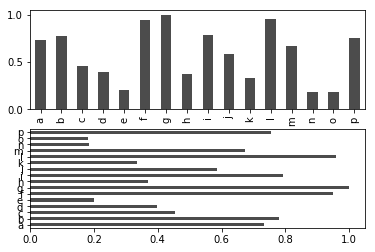

In [52]:
#下面开始绘制柱状图
# 首先用Series绘制柱状图
# kind='bar' 或 kind='barh'
fig, axes = plt.subplots(2, 1)    # 创建一个两行一列的subplot对象
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)    # 第一个图像用ax=axes[0]这个来控制
data.plot(kind='barh', ax=axes[1], color='k',alpha=0.7)     # 第二个图像用ax=axes[1]这个来控制

In [ ]:
# 下面使用dataframe进行绘图

